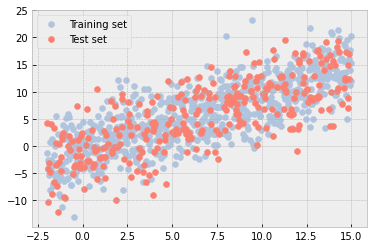

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import normal
plt.style.use('bmh')
%matplotlib inline

np.random.seed(3)

x = np.linspace(start = -2, stop=15, num=1000)
intercept, x_coef = -1, 1 
y = [x_coef*i + intercept for i in x]
y = [i+normal(0, 4) for i in y]

data = pd.DataFrame({'x': x, 'y': y})

# Split the data into training/testing sets
train, test = train_test_split(data, test_size=0.3)
X_train, X_test = train.x, test.x

# Split the targets into training/testing sets
y_train, y_test = train.y, test.y

plt.scatter(X_train, y_train, color='lightsteelblue', label = 'Training set')
plt.scatter(X_test, y_test, color='salmon', label = 'Test set')
plt.legend()

In [7]:
import mxnet as mx
from mxnet import nd, autograd, gluon


model_ctx=mx.cpu()
par={'weights':nd.random_normal(shape=1,ctx=model_ctx),'bias':nd.random_normal(shape=1,ctx=model_ctx)}
hyper={'alpha':nd.array(10.0, ctx=model_ctx)}

In [8]:
import sys
sys.path.append("../") 

# No Uncertainty

In [12]:
from hamiltonian.inference.bbb import sgd
from hamiltonian.models.linear import linear

par_aleatoric={'weights':nd.random_normal(shape=1,ctx=model_ctx),
     'bias':nd.random_normal(shape=1,ctx=model_ctx),
     'weights_scale':nd.random_normal(shape=1,ctx=model_ctx),
     'bias_scale':nd.random_normal(shape=1,ctx=model_ctx)}
hyper={'alpha':nd.array(10.0, ctx=model_ctx),'scale':1.}
model=linear(hyper,ctx=model_ctx)
inference=sgd(model,par_aleatoric,step_size=0.05,ctx=model_ctx)

In [13]:
import numpy as np

X_train_tensor=X_train.values[:,np.newaxis]
y_train_tensor=y_train.values

In [14]:
par,loss=inference.fit(epochs=1000,batch_size=64,gamma=0.9,
                       X_train=X_train_tensor,y_train=y_train_tensor,verbose=False)

100%|██████████| 1000/1000 [00:12<00:00, 77.26it/s]


In [15]:
X_test_tensor=nd.array(X_test.values[:,np.newaxis],ctx=model_ctx)

In [16]:
y_pred=model.predict(par,X_test_tensor)

In [17]:
y_pred.stddev

1.0

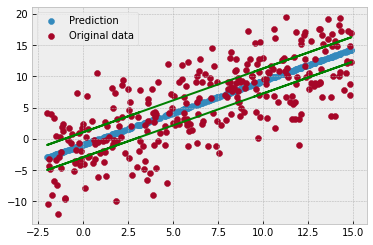

In [18]:
plt.scatter(X_test, y_pred.mean.asnumpy(), label = 'Prediction')
plt.plot(X_test,y_pred.mean.asnumpy()+2*y_pred.stddev,'g')
plt.plot(X_test,y_pred.mean.asnumpy()-2*y_pred.stddev,'g')
plt.scatter(X_test, y_test, label = 'Original data')
plt.legend()

In [19]:
y_pred.stddev

1.0

# Aleatoric Uncertainty

AttributeError: 'int' object has no attribute 'asnumpy'

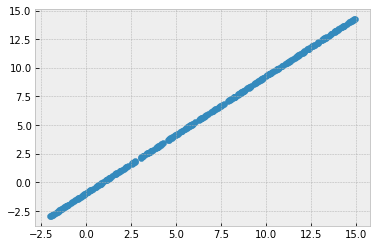

In [15]:
plt.scatter(X_test, y_pred.mean.asnumpy(), label = 'Prediction')
plt.plot(X_test,y_pred.mean.asnumpy()+2*y_pred.scale.asnumpy(),'g')
plt.plot(X_test,y_pred.mean.asnumpy()-2*y_pred.scale.asnumpy(),'g')
plt.scatter(X_test, y_test, label = 'Original data')
plt.legend()